## In this code we are gonig to try to explore the wave function under 1D harmonic oscillator, eventually we will calculate the eigenvalues and eigenstates of the energy under the harmonic oscillator basis and compute the matrix

First we initialize several libraries to make our plot look nicer and easier

In [1]:
# First load the numpy/scipy/matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load interactive widgets
import ipywidgets as widgets
from IPython.display import display

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'

We will call hermite function from the library scipy

In [2]:
# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite
from math import factorial

##m=1
##hbar=
##omega=hbar*c*(1/197)
##omega=1/197
## hbar*c=1/197 * omega

#Check to see if they match the table
H=hermite(4)
print(H)

    4      2
16 x - 48 x - 8.882e-16 x + 12


Then we will initialze a space and plot the hermite function to see what it looks like

Text(0, 0.5, '$H_n(x)$')

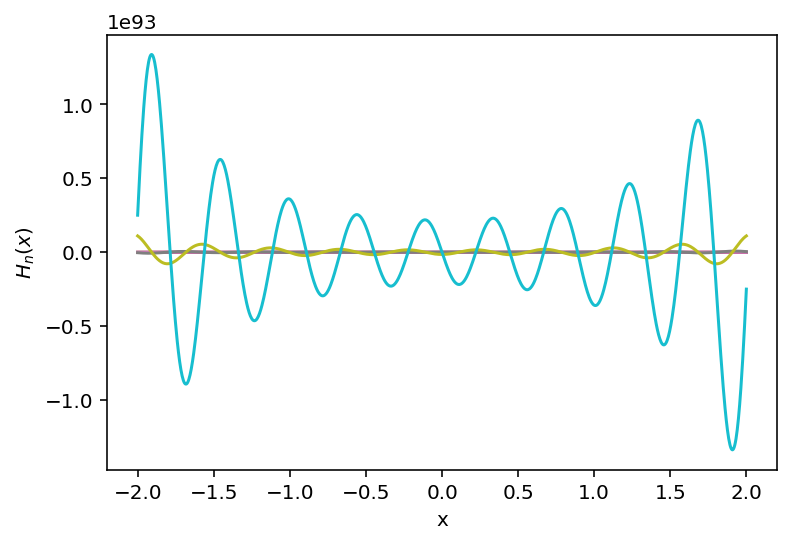

In [3]:
x=np.linspace(-2,2,1000) # Range needs to be specified for plotting functions of x

for v in range(0,100):
    
    H=hermite(v)      # hermite polynomial, v is the order of the polynomial
    
    f=H(x)            # x defined as variable of the hermite polynomial
    
    plt.plot(x,f)

plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')

We will define the normailization factor and then our wave function under harmonic oscillator, further details can be found from the textbook of Griffith, quantum mechanics 

In [4]:
def N(v):
    '''Normalization constant '''
    
    return 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))

def psi(v, x):
    """Harmonic oscillator wavefunction for level v computed on grid of points x"""
    
    Hr=hermite(v) 
    
    Psix = N(v)*Hr(x)*np.exp(-0.5*x**2)     # our wave function under harmonic oscillator, note that m hbar are treated as unit here
    
    return Psix

Check the orthogonality of our wave function

In [5]:
# Check orthogonality

psi(1,x) @ psi(4,x)

1.9984014443252818e-15

Check if the normalization of same state wavefunction return value 1 

In [6]:
# Normalization is computed by using numerical integration with trapezoidal method:
from scipy.integrate import trapz

# remember that x runs form -inf to +inf so lets use large xmin and xmax
x=np.linspace(-10,10,1000)

psi2=psi(4,x)**2                   # squaring the wavefunction

Integral = trapz(psi2,x)           # using trapzoid rule for integration to check the normalization

print(Integral)

1.0000000000000009


We will plot our wave function^2 here to see how it looks like actually 

In [7]:
@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    y= psi(v,x)**2                     # phi^2, squared wave function
    
    plt.plot(x,y,lw=2)                 # plot the squared wavefunction 
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$\psi_n(x)$',fontsize=16)


interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…

It looks exactly like the graph from the Griffith's textbook on quantum mechanics, which is good for us

In [8]:
def E(v):
    '''Eigenvalues in units of h'''
    
    return (v + 0.5)                # this is the eigenvalues of energy states from the textbook 

def V(x):
    """Potential energy function"""
    
    return 0.5*x**2                # harmonic ocsillator potential 

On the above cell we just defined the V potential and our energy eigenvalues 

In [9]:
def E(v):
    '''Eigenvalues in units of h'''
    
    return (v + 0.5)                  ## energy eigenvalues, according to griffith's textbook, however below we will use gaussian quadrature to calculate these values numerically

def V(x):
    """Potential energy function"""
    
    return 0.5*x**2                   ## potential of harmonic oscillator, can be changed if we have other potential in future

We will define our upper and lower boundary of our x in order to make a plot of our wavefunction and potential in one graph

In [10]:
# plot up to level vmax
VMAX=8 

# Range of x determine by classical tunring points:
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))     ##defining the lower and upper boundary of x axis of our plot

x = np.linspace(xmin, xmax, 1000)

Then we plot it using the knowledge we know about the eigenstates of harmonic oscillator, we will check it using numerical methods later

Text(0, 0.5, '$\\psi^2_n(x)$')

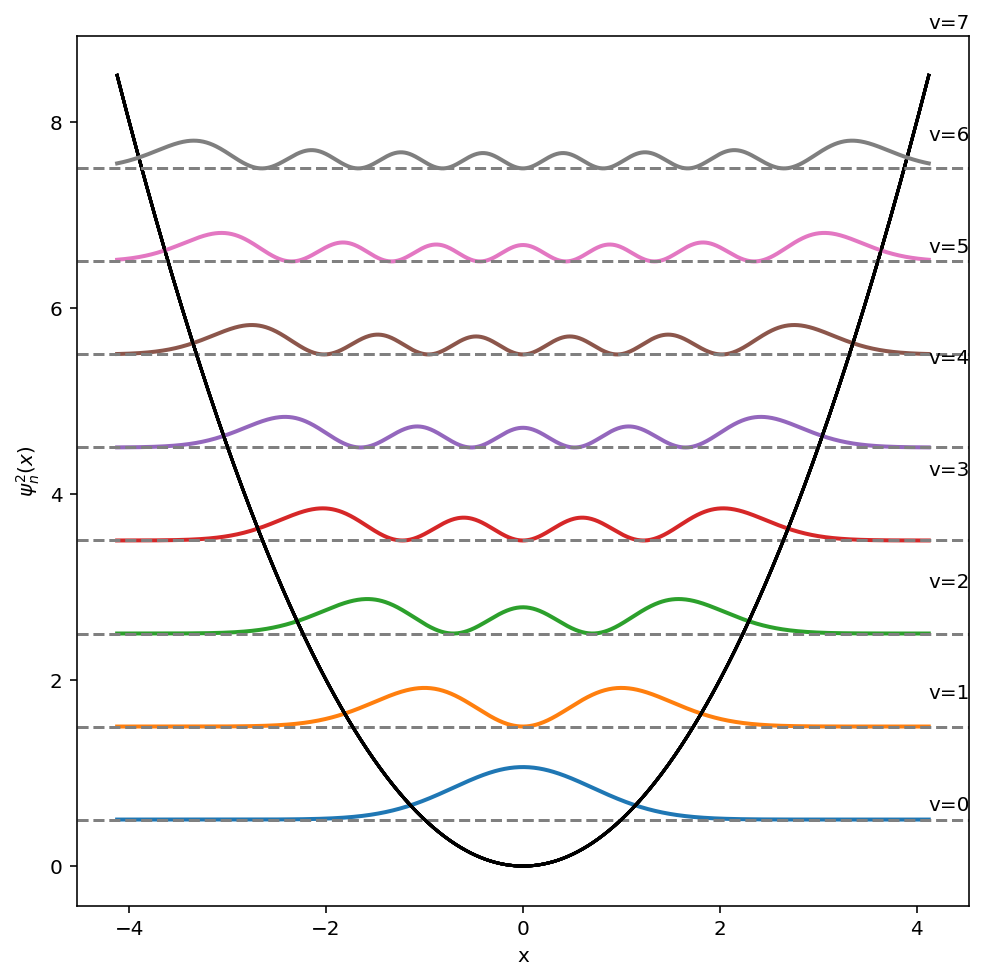

In [11]:
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):                          # set our hermite polynoial to 8th energy state
     
    # plot potential V(x)
    ax.plot(x,V(x),color='black')           #plotting the potential 
    
    # plot psi squared which we shift up by values of energy
    ax.plot(x,psi(v,x)**2 + E(v), lw=2)     # ploting the wavefunction squared
    
    # add lines and labels
    ax.axhline(E(v), color='gray', linestyle='--')  #adjusting the plotline color
    ax.text(xmax, 1.2*E(v), f"v={v}")       

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')

## Here we are going to implement integral of $\int \psi*p^{2}*\psi$ using gaussian quadrature method, the result of which will be the most simple situation when we consider the wave function under momentum space

The essence of this is to check whether our eigenvalues and energy states calculated by numerically integrating phi*p^2*phi would coincide with the theoretical ones above, once we finish the numerical calculation we will make a plot from it to see how it matches with the plot above

In [12]:
from math import exp                           
import numpy as np
from sympy import diff, integrate, exp          
from scipy.misc import derivative              # import from scipy derivative 
v=10                                           # set hermite polynomial
                                           
n= 200                                           # set number of points we are taking from laggauss    
b= 12                                           # set th uper bound and lower bound
a=-12         
h=((b-a)/2)                                    # according to gaussian quadrature, we have to time dx/dksi=(b-a)/2 after we made linear transformation                              



   
    
t, w = np.polynomial.legendre.leggauss(n)      # initialize mesh points and weights for gaussian quadrature using np legendre lagauss
print ("x=",t,"w=",w)
    

xi=t*h+(a+b)/2                                 # linear transformation according to gaussian quadrature method                                          

    

    


def function(v,x):                             #define a function for calculating psi*p^2*psi and do linear transformation to change variable
      
    
    f=psi(v,x)*(derivative(lambda x:psi(v,x),x,n=2,dx=0.0001))    # lambda function make two variable function into a one variable function
    
    return f                                            #H
print("f=",f)                                              # print our result of the first state function phi*p^2*phi

#A=np.array(f)
                               # take arrays of variable from our xi=ti*h+(a+b)/2 and plug it in function
    
A=w*function(v,xi)

print("type=",type(A))
print("shape=",np.shape(A))

def normalization(v):
    N=h*np.sum(w*psi(v,xi)*psi(v,xi))
    return N
    
Normalization=normalization(v)


print("Normalization=",Normalization)
    
F=h*np.sum(A)                                        # sum up all expectation value to get integral of phi*p^2*phi
                                                     




print("Sum=",F)                                    # print the sum of our result and get the integral of phi*p^2*phi



x= [-0.99992807 -0.99962103 -0.99906872 -0.99827116 -0.99722851 -0.99594105
 -0.99440908 -0.99263297 -0.99061317 -0.98835016 -0.98584451 -0.98309683
 -0.98010779 -0.97687813 -0.97340864 -0.96970018 -0.96575364 -0.96157001
 -0.95715031 -0.95249562 -0.94760709 -0.94248591 -0.93713335 -0.93155071
 -0.92573938 -0.91970077 -0.91343637 -0.90694771 -0.9002364  -0.89330407
 -0.88615242 -0.87878323 -0.87119828 -0.86339945 -0.85538866 -0.84716785
 -0.83873907 -0.83010437 -0.82126587 -0.81222575 -0.80298622 -0.79354955
 -0.78391806 -0.77409412 -0.76408013 -0.75387855 -0.74349189 -0.73292271
 -0.72217358 -0.71124716 -0.70014612 -0.68887319 -0.67743113 -0.66582277
 -0.65405094 -0.64211854 -0.63002849 -0.61778377 -0.60538738 -0.59284236
 -0.58015179 -0.5673188  -0.55434652 -0.54123815 -0.52799691 -0.51462603
 -0.50112881 -0.48750856 -0.47376863 -0.45991238 -0.44594322 -0.43186458
 -0.41767992 -0.40339271 -0.38900646 -0.37452472 -0.35995102 -0.34528896
 -0.33054212 -0.31571413 -0.30080864 -0.28582929

In [13]:
print("N",N)

N <function N at 0x7fa3b2812670>


For cross state we'll use similar method to calculate the eigenvalues 

In [14]:
def function2(v,x):                                 # test function 
    f=psi(v,x)*(derivative(lambda x:psi(v,x),x,n=2,dx=0.0001))
    return f

u=function2


#function(u,v,x)
def function3(function_unknown,v,x):               #
    return 2*function_unknown(v,x)
value=function3(u,v,xi)
print("value=",value)

value= [ 3.20975645e-43  3.48175717e-43  4.03006435e-43  4.97686448e-43
  6.55585583e-43  9.20872409e-43  1.37879987e-42  2.19957493e-42
  3.73667353e-42  6.75589239e-42  1.29910204e-41  2.65490049e-41
  5.76167985e-41  1.32668432e-40  3.23814205e-40  8.36945477e-40
  2.28826210e-39  6.61039916e-39  2.01530537e-38  6.47583389e-38
  2.19035967e-37  7.78747306e-37  2.90609182e-36  1.13657537e-35
  4.65138718e-35  1.98864148e-34  8.86727940e-34  4.11652339e-33
  1.98609611e-32  9.94030884e-32  5.15119230e-31  2.75854845e-30
  1.52354056e-29  8.66050068e-29  5.05641267e-28  3.02571436e-27
  1.85163569e-26  1.15628001e-25  7.35139549e-25  4.74763668e-24
  3.10720726e-23  2.05596148e-22  1.37202399e-21  9.21178096e-21
  6.20693357e-20  4.18660314e-19  2.81955381e-18  1.89102918e-17
  1.25968781e-16  8.31196142e-16  5.41788279e-15  3.47880374e-14
  2.19417273e-13  1.35548232e-12  8.17736282e-12  4.80299703e-11
  2.73803460e-10  1.51007993e-09  8.03070949e-09  4.10394785e-08
  2.00805170e-07  

In [17]:
v1=8
v2=10
v[imax]=20

for i in range(0,20,1)       ##calculate wavefunction from 0 to 20
   def wave_function(v[i],x): 
        psi[i]=psi(v[i],x)
    
        return psi[i]
       

def function_cross_term(v1,v2,x):        
    f=psi(v1,x)*(derivative(lambda x:psi(v2,x),x,n=2,dx=0.0001))
    
    return f

A2=w*function_cross_term(v1,v2,xi)
function_cross_term(v1,v2,xi)
                              ##function does 
sum2=h*np.sum(A2) 

print("Sum=",sum2) 

Sum= 4.743416427831255


In [32]:
#we are going to write a matrix for hamiltonian
#A[n]
   
A11=h*np.sum(w*function_cross_term(v1,v1,xi))
A12=h*np.sum(w*function_cross_term(v1,v2,xi))
A21=h*np.sum(w*function_cross_term(v2,v1,xi))
A22=h*np.sum(w*function_cross_term(v2,v2,xi))
print("A11=",A11,"A12=",A12,"A21",A21,"A22",A22)

A11= -8.4999998785628 A12= 4.743416427831255 A21 4.743416392453155 A22 -10.499999869576081


In [31]:
from numpy import linalg as LA
Hamiltonian=np.array([[A11, A12], [A21, A22]])
print("Hamiltonian=",Hamiltonian)
Eigenvalues=LA.eig(Hamiltonian)
print("eigenvalue=",Eigenvalues)

Hamiltonian= [[ -8.49999988   4.74341643]
 [  4.74341639 -10.49999987]]
eigenvalue= (array([ -4.6523201 , -14.34767965]), array([[ 0.77662226, -0.62996657],
       [ 0.62996656,  0.77662225]]))


In [ ]:
## calculate H using symmetry, since it is hermitian,

